#Tutorial 3 & Tutorial 4 重点
**Interpolation Mathods: **
*   Newton Divided Difference Polynomial Method
*   Lagrange Interpolating Polynomial
*   Least Square Method

In [ ]:
import sympy as sp
import numpy as np
import math
import matplotlib.pyplot as plt

## Newton Divided Difference Polynomial Method

In [ ]:
## Divided difference table
def divided_difference_table(x, y):
    """
    Function to construct the divided difference table.

    Parameters:
    ----------------
    :param x: List of x-coordinates (input data).
    :param y: List of y-coordinates (output data corresponding to x).

    :return: A table of divided differences.
    """
    n = len(x)
    table = np.zeros([n, n])
    table[:, 0] = y  # The first column is just the y-values

    # Fill the divided difference table
    for j in range(1, n):
        for i in range(n - j):
            table[i, j] = (table[i + 1, j - 1] - table[i, j - 1]) / (x[i + j] - x[i])

    return table


In [ ]:
## Newton Divided Difference
def newton_polynomial(x, y):
    """
    Generate the Newton interpolation polynomial as a sympy expression.

    Parameters:
    ----------------
    :param x: List of x-coordinates (input data).
    :param y: List of y-coordinates (output data corresponding to x).

    :return: The Newton interpolation polynomial as a sympy expression.
    """
    n = len(x)
    table = divided_difference_table(x, y)

    # Define symbolic variable
    X = sp.symbols('X')

    # Start the polynomial with the first divided difference
    polynomial = table[0][0]
    print(f"Order 0 Polynomial: {polynomial}")


    # Construct the polynomial in Newton form
    for i in range(1, n):
        term = table[0][i]
        for j in range(i):
            term *= (X - x[j])
        polynomial += term

        # Print the polynomial after adding each term (divided difference order)
        print(f"Order {i} Polynomial: {sp.simplify(polynomial)}")

    return polynomial

## Get the newton polynomial equation
def get_newton_polynomial_equation(x, y):
    """
    Get the equation of the Newton interpolation polynomial.
    """
    polynomial = newton_polynomial(x, y)
    # Simplify the expression for cleaner output
    polynomial = sp.simplify(polynomial)
    return polynomial

In [ ]:
## Plot the newton polynomial graph
def plot_newton_polynomial(x, y, true_func=None, start=-5, end=5, num_points=100):
    """
    Function to plot the Newton polynomial and the original data points.

    Parameters:
    ----------------
    :param x: List of x-coordinates (input data).
    :param y: List of y-coordinates (output data corresponding to x).
    :param true_func: A true function to plot alongside (optional).
    :param start: The start of the plot range.
    :param end: The end of the plot range.
    :param num_points: Number of points for plotting the polynomial curve.
    """
    # Define a range of x-values for plotting
    x_vals = np.linspace(start, end, num_points)

    # Calculate the corresponding y-values of the Newton polynomial
    # We first convert the sympy polynomial to a function for evaluation
    newton_poly_func = sp.lambdify(sp.symbols('X'), newton_polynomial(x, y), "numpy")
    y_vals = newton_poly_func(x_vals)

    # Plot the Newton polynomial
    plt.plot(x_vals, y_vals, label="Newton Interpolation Polynomial", color='r', linewidth=2)

    # Plot the original data points
    plt.scatter(x, y, color='b', label="Data Points", zorder=5)

    # Plot the true function if provided
    if true_func:
        # Convert true function to a numpy-compatible function
        y_true_vals = true_func(x_vals)
        plt.plot(x_vals, y_true_vals, label="True Function", color='g', linestyle='--')

    # Add labels and title
    plt.title("Newton's Divided Difference Interpolation Polynomial")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
## Get the polynomial value at specific point
def get_newton_polynomial_value(x, y, value):
    """
    Function to calculate the Newton interpolation polynomial using divided differences.

    Parameters:
    ----------------
    :param x: List of x-coordinates (input data).
    :param y: List of y-coordinates (output data corresponding to x).
    :param value: The value of x for which to evaluate the polynomial.

    :return: The value of the polynomial at `value`.
    """
    n = len(x)
    table = divided_difference_table(x, y)

    # The Newton polynomial
    result = table[0, 0]
    product = 1

    for i in range(1, n):
        product *= (value - x[i - 1])
        result += table[0, i] * product

    return result


## Lagrange Interpolating Polynomial

In [ ]:
## Create lagrange table
def create_lagrange_table(x_data, y_data):
    """
    Creates the Lagrange interpolation table (not necessary for actual interpolation but for visual reference).
    """
    table = []
    for i in range(len(x_data)):
        row = []
        for j in range(len(x_data)):
            if i == j:
                row.append(1)
            else:
                row.append(f'(x - {x_data[j]}) / ({x_data[i]} - {x_data[j]})')
        table.append(row)
    return table

In [ ]:
## Lagrange interpolation polynomial
def lagrange_interpolation_polynomial(x_data, y_data):
    """
    Computes the Lagrange interpolation polynomial for the given data points.
    """
    x = sp.symbols('x')
    lagrange_polynomial = 0

    print('Langrange Basis Polynomials')
    for i in range(len(x_data)):
        L_i = 1
        for j in range(len(x_data)):
            if j != i:
                L_i *= (x - x_data[j]) / (x_data[i] - x_data[j])

        # Add the contribution of each term to the polynomial
        lagrange_polynomial += y_data[i] * L_i

        # Print the Lagrange basis polynomial for degree i
        print(f"L_{i}(x) = ", sp.simplify(L_i))

    # Simplify the polynomial expression
    return sp.simplify(lagrange_polynomial)

## Get the lagrange interpolation polynomial equation
def lagrange_interpolation_polynomial_equation(x_data, y_data):
    """
    Returns the equation of the Lagrange interpolation polynomial.
    """
    lagrange_polynomial = lagrange_interpolation_polynomial(x_data, y_data)
    print(f'Final Lagrange Interpolation Polynomial: ', lagrange_polynomial)
    return lagrange_polynomial

In [ ]:
## Plot the lagrange polynomial graph
def plot_lagrange_polynomial_graph(x_data, y_data, start=-5, end=5, num_points=400):
    """
    Plots the Lagrange interpolation polynomial and data points.
    """
    x_vals = np.linspace(start, end, num_points)
    # Get the Lagrange polynomial formula
    lagrange_polynomial = lagrange_interpolation_polynomial(x_data, y_data)
    f_lagrange = sp.lambdify(sp.symbols('x'), lagrange_polynomial, 'numpy')
    y_vals = f_lagrange(x_vals)

    # Plot the polynomial and the data points
    plt.plot(x_vals, y_vals, label="Lagrange Polynomial", color='r', linewidth=2)
    plt.scatter(x_data, y_data, color='b', label="Data Points", zorder=5)
    plt.title("Lagrange Interpolation Polynomial")
    plt.xlabel("x")
    plt.ylabel("p(x)")
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
## Get the polynomial value at specific point
def evaluate_polynomial_at_point(x_data, y_data, x_point):
    """
    Evaluates the Lagrange interpolation polynomial at a specific point x_point.
    """
    lagrange_polynomial = lagrange_interpolation_polynomial(x_data, y_data)
    f_lagrange = sp.lambdify(sp.symbols('x'), lagrange_polynomial, 'numpy')
    return f_lagrange(x_point)

## Least Square Approximation linear

In [ ]:
## create least square table
def create_least_square_table(x_values, y_values):
    """
    Create a table of x and y values.

    Parameters:
    ----------------
    :param x_values: List of x-values
    :param y_values: List of corresponding y-values

    :return: None (prints the table)
    """
    print("Data Points Table:")
    print("x\t y")
    for x, y in zip(x_data, y_data):
        print(f"{x}\t {y}")

In [ ]:
def least_square_approximation(x_data, y_data):
    """
    Compute the least squares linear approximation.

    Parameters:
    ----------------
    :param x_data: List of x-coordinates.
    :param y_data: List of y-coordinates.

    :return: Tuple (m, c) for the line equation y = mx + c.
    """
    n = len(x_data)
    sum_x = sum(x_data)
    sum_y = sum(y_data)
    sum_xy = sum(x * y for x, y in zip(x_data, y_data))
    sum_x2 = sum(x ** 2 for x in x_data)

    # Calculate m and c
    m = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x ** 2)
    c = (sum_y - m * sum_x) / n

    print(f"Least Squares Linear Approximation: y = {m:.4f}x + {c:.4f}")
    return m, c

In [ ]:
def plot_least_square_approximation(x_data, y_data, m, c):
    """
    Plot the least squares linear approximation and data points.

    Parameters:
    ----------------
    :param x_data: List of x-coordinates.
    :param y_data: List of y-coordinates.
    :param m: Slope of the least squares line.
    :param c: Intercept of the least squares line.
    """
    # Generate x values for the line
    x_vals = np.linspace(min(x_data), max(x_data), 100)
    y_vals = m * x_vals + c

    # Plot the line
    plt.plot(x_vals, y_vals, color='r', label=f"y = {m:.4f}x + {c:.4f}")

    # Plot the data points
    plt.scatter(x_data, y_data, color='b', label="Data Points")

    # Add labels and legend
    plt.title("Least Squares Linear Approximation")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
def get_least_square_value_at_point(m, c, x_point):
    """
    Get the least square approximation value at a specific point.

    Parameters:
    ----------------
    :param m: Slope of the least squares line.
    :param c: Intercept of the least squares line.
    :param x_point: The x-value for which y needs to be estimated.

    :return: Approximated y-value.
    """
    y_point = m * x_point + c
    print(f"The estimated value at x = {x_point} is y = {y_point:.4f}")
    return y_point

# Question

## Newton Divided Difference Polynomial Method

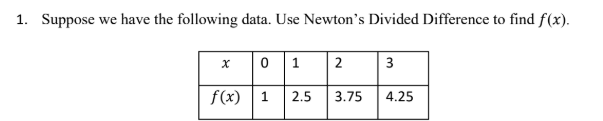

Divided difference table: 
[[ 1.          1.5        -0.125      -0.08333333]
 [ 2.5         1.25       -0.375       0.        ]
 [ 3.75        0.5         0.          0.        ]
 [ 4.25        0.          0.          0.        ]]

Order 0 Polynomial: 1.0
Order 1 Polynomial: 1.5*X + 1.0
Order 2 Polynomial: -0.125*X**2 + 1.625*X + 1.0
Order 3 Polynomial: -0.0833333333333333*X**3 + 0.125*X**2 + 1.45833333333333*X + 1.0

New interpolation polynomial: 
-0.0833333333333333*X**3 + 0.125*X**2 + 1.45833333333333*X + 1.0

Polynomial value at 1.5:  3.1875
Order 0 Polynomial: 1.0
Order 1 Polynomial: 1.5*X + 1.0
Order 2 Polynomial: -0.125*X**2 + 1.625*X + 1.0
Order 3 Polynomial: -0.0833333333333333*X**3 + 0.125*X**2 + 1.45833333333333*X + 1.0


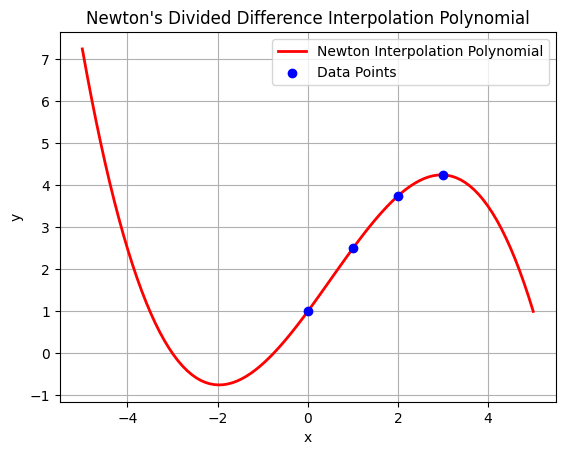

In [ ]:
# Given the data points
x = [0, 1, 2, 3]
y = [1, 2.5, 3.75, 4.25]

# Divided difference table
print(f'Divided difference table: \n{divided_difference_table(x, y)}\n')

# Get the equation of the Newton interpolation polynomial
newton_equation = get_newton_polynomial_equation(x, y)
print(f'\nNew interpolation polynomial: \n{newton_equation}\n')

# Get the polynomial value at specific point
point = 1.5
print(f'Polynomial value at {point}: ',get_newton_polynomial_value(x ,y ,point))

# Plot the newton polynomial graph
plot_newton_polynomial(x, y, true_func=None)  # Replace `true_func` if you have an actual function

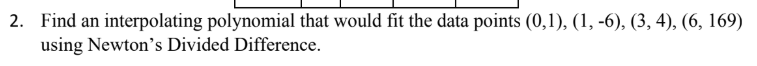

Divided difference table: 
[[  1.  -7.   4.   1.]
 [ -6.   5.  10.   0.]
 [  4.  55.   0.   0.]
 [169.   0.   0.   0.]]

Order 0 Polynomial: 1.0
Order 1 Polynomial: 1.0 - 7.0*X
Order 2 Polynomial: 4.0*X**2 - 11.0*X + 1.0
Order 3 Polynomial: 1.0*X**3 - 8.0*X + 1.0

New interpolation polynomial: 
1.0*X**3 - 8.0*X + 1.0

Polynomial value at 1.5:  -7.625
Order 0 Polynomial: 1.0
Order 1 Polynomial: 1.0 - 7.0*X
Order 2 Polynomial: 4.0*X**2 - 11.0*X + 1.0
Order 3 Polynomial: 1.0*X**3 - 8.0*X + 1.0


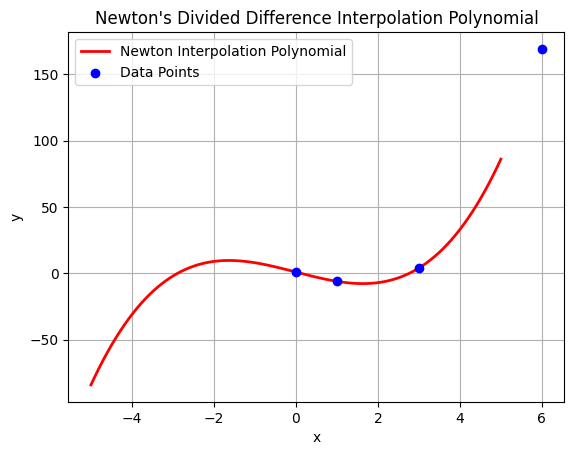

In [ ]:
# Given the data points
x = [0, 1, 3, 6]
y = [1, -6, 4, 169]

# Divided difference table
print(f'Divided difference table: \n{divided_difference_table(x, y)}\n')

# Get the equation of the Newton interpolation polynomial
newton_equation = get_newton_polynomial_equation(x, y)
print(f'\nNew interpolation polynomial: \n{newton_equation}\n')

# Get the polynomial value at specific point
point = 1.5
print(f'Polynomial value at {point}: ',get_newton_polynomial_value(x ,y ,point))

# Plot the newton polynomial graph
plot_newton_polynomial(x, y, true_func=None)  # Replace `true_func` if you have an actual function

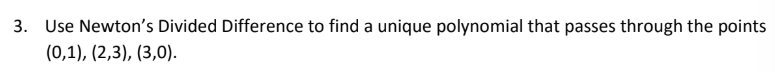

Divided difference table: 
[[ 1.          1.         -1.33333333]
 [ 3.         -3.          0.        ]
 [ 0.          0.          0.        ]]

Order 0 Polynomial: 1.0
Order 1 Polynomial: 1.0*X + 1.0
Order 2 Polynomial: -1.33333333333333*X**2 + 3.66666666666667*X + 1.0

New interpolation polynomial: 
-1.33333333333333*X**2 + 3.66666666666667*X + 1.0

Polynomial value at 1.5:  3.5
Order 0 Polynomial: 1.0
Order 1 Polynomial: 1.0*X + 1.0
Order 2 Polynomial: -1.33333333333333*X**2 + 3.66666666666667*X + 1.0


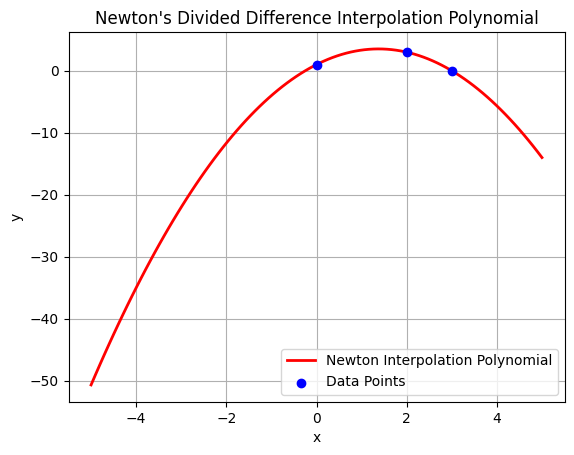

In [ ]:
x = [0, 2, 3]
y = [1, 3, 0]

# Divided difference table
print(f'Divided difference table: \n{divided_difference_table(x, y)}\n')

# Get the equation of the Newton interpolation polynomial
newton_equation = get_newton_polynomial_equation(x, y)
print(f'\nNew interpolation polynomial: \n{newton_equation}\n')

# Get the polynomial value at specific point
point = 1.5
print(f'Polynomial value at {point}: ',get_newton_polynomial_value(x ,y ,point))

# Plot the newton polynomial graph
plot_newton_polynomial(x, y, true_func=None)  # Replace `true_func` if you have an actual function

## Lagrange Interpolating Polynomial

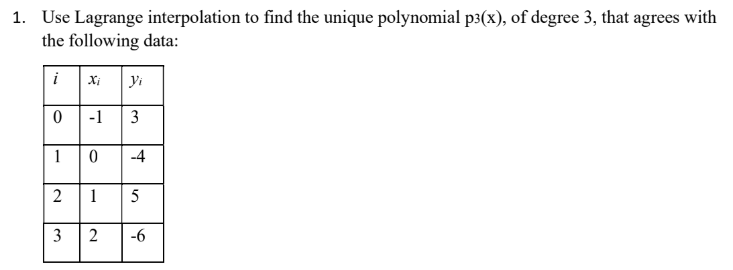

Lagrange Interpolation Table:
[1, '(x - 0) / (-1 - 0)', '(x - 1) / (-1 - 1)', '(x - 2) / (-1 - 2)']
['(x - -1) / (0 - -1)', 1, '(x - 1) / (0 - 1)', '(x - 2) / (0 - 2)']
['(x - -1) / (1 - -1)', '(x - 0) / (1 - 0)', 1, '(x - 2) / (1 - 2)']
['(x - -1) / (2 - -1)', '(x - 0) / (2 - 0)', '(x - 1) / (2 - 1)', 1]
Langrange Basis Polynomials
L_0(x) =  -x*(x - 2)*(x - 1)/6
L_1(x) =  (x - 2)*(x - 1)*(x + 1)/2
L_2(x) =  x*(-x**2 + x + 2)/2
L_3(x) =  x*(x**2 - 1)/6
Final Lagrange Interpolation Polynomial:  -6*x**3 + 8*x**2 + 7*x - 4

Lagrange Interpolation Polynomial Equation: -6*x**3 + 8*x**2 + 7*x - 4
Langrange Basis Polynomials
L_0(x) =  -x*(x - 2)*(x - 1)/6
L_1(x) =  (x - 2)*(x - 1)*(x + 1)/2
L_2(x) =  x*(-x**2 + x + 2)/2
L_3(x) =  x*(x**2 - 1)/6


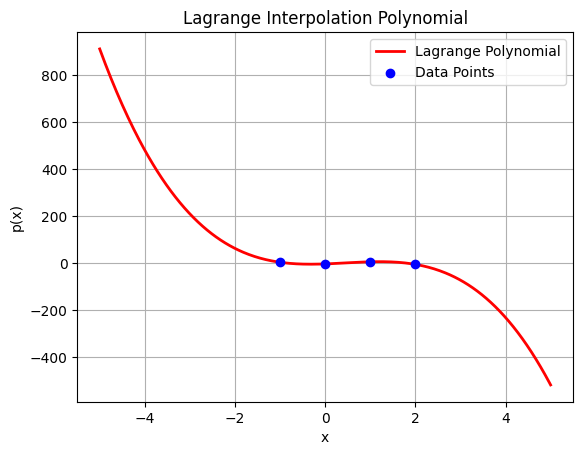

Langrange Basis Polynomials
L_0(x) =  -x*(x - 2)*(x - 1)/6
L_1(x) =  (x - 2)*(x - 1)*(x + 1)/2
L_2(x) =  x*(-x**2 + x + 2)/2
L_3(x) =  x*(x**2 - 1)/6

The value of the Lagrange polynomial at x = 1.5 is 4.25


In [ ]:
# Example usage with the given data points
x = [-1, 0, 1, 2]
y = [3, -4, 5, -6]

# Create Lagrange Table
table = create_lagrange_table(x, y)
print(f"Lagrange Interpolation Table:")
for row in table:
    print(row)

# Get the Lagrange interpolation polynomial equation
lagrange_eq = lagrange_interpolation_polynomial_equation(x, y)
print(f"\nLagrange Interpolation Polynomial Equation: {lagrange_eq}")

# Plot the Lagrange polynomial and the data points
plot_lagrange_polynomial_graph(x, y)

# Evaluate the polynomial at a specific point (e.g., x = 1.5)
x_point = 1.5
y_at_point = evaluate_polynomial_at_point(x, y, x_point)
print(f"\nThe value of the Lagrange polynomial at x = {x_point} is {y_at_point}")

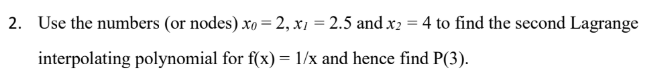

Lagrange Interpolation Table:
[1, '(x - 2.5) / (2 - 2.5)', '(x - 4) / (2 - 4)']
['(x - 2) / (2.5 - 2)', 1, '(x - 4) / (2.5 - 4)']
['(x - 2) / (4 - 2)', '(x - 2.5) / (4 - 2.5)', 1]
Langrange Basis Polynomials
L_0(x) =  (x - 4)*(2.0*x - 5.0)/2
L_1(x) =  -1.33333333333333*x**2 + 8.0*x - 10.6666666666667
L_2(x) =  (0.666666666666667*x - 1.66666666666667)*(x - 2)/2
Final Lagrange Interpolation Polynomial:  0.05*x**2 - 0.425*x + 1.15

Lagrange Interpolation Polynomial Equation: 0.05*x**2 - 0.425*x + 1.15
Langrange Basis Polynomials
L_0(x) =  (x - 4)*(2.0*x - 5.0)/2
L_1(x) =  -1.33333333333333*x**2 + 8.0*x - 10.6666666666667
L_2(x) =  (0.666666666666667*x - 1.66666666666667)*(x - 2)/2


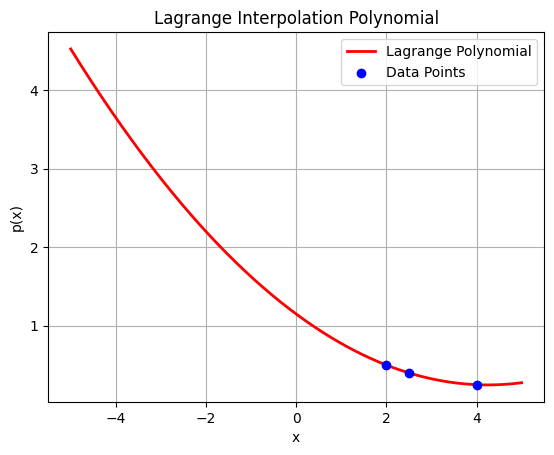

Langrange Basis Polynomials
L_0(x) =  (x - 4)*(2.0*x - 5.0)/2
L_1(x) =  -1.33333333333333*x**2 + 8.0*x - 10.6666666666667
L_2(x) =  (0.666666666666667*x - 1.66666666666667)*(x - 2)/2

The value of the Lagrange polynomial at x = 3 is 0.32499999999999996


In [ ]:
def f(x):
  return 1/x

x = [2, 2.5, 4]
y = [f(x) for x in x] # Get the corresponding y values by applying f(x)

# Create Lagrange Table
table = create_lagrange_table(x, y)
print(f"Lagrange Interpolation Table:")
for row in table:
    print(row)

# Get the Lagrange interpolation polynomial equation
lagrange_eq = lagrange_interpolation_polynomial_equation(x, y)
print(f"\nLagrange Interpolation Polynomial Equation: {lagrange_eq}")

# Plot the Lagrange polynomial and the data points
plot_lagrange_polynomial_graph(x, y)

# Evaluate the polynomial at a specific point (e.g., x = 1.5)
x_point = 3
y_at_point = evaluate_polynomial_at_point(x, y, x_point)
print(f"\nThe value of the Lagrange polynomial at x = {x_point} is {y_at_point}")

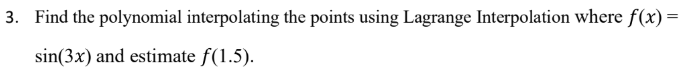

Lagrange Interpolation Table:
[1, '(x - 2.5) / (2 - 2.5)', '(x - 4) / (2 - 4)']
['(x - 2) / (2.5 - 2)', 1, '(x - 4) / (2.5 - 4)']
['(x - 2) / (4 - 2)', '(x - 2.5) / (4 - 2.5)', 1]
Langrange Basis Polynomials
L_0(x) =  (x - 4)*(2.0*x - 5.0)/2
L_1(x) =  -1.33333333333333*x**2 + 8.0*x - 10.6666666666667
L_2(x) =  (0.666666666666667*x - 1.66666666666667)*(x - 2)/2
Final Lagrange Interpolation Polynomial:  -0.937999976774739*(0.666666666666667*x - 2.66666666666667)*(2.0*x - 4.0) + (0.666666666666667*x - 1.66666666666667)*(x - 2)*sin(12)/2 + (x - 4)*(2.0*x - 5.0)*sin(6)/2

Lagrange Interpolation Polynomial Equation: -0.937999976774739*(0.666666666666667*x - 2.66666666666667)*(2.0*x - 4.0) + (0.666666666666667*x - 1.66666666666667)*(x - 2)*sin(12)/2 + (x - 4)*(2.0*x - 5.0)*sin(6)/2
Langrange Basis Polynomials
L_0(x) =  (x - 4)*(2.0*x - 5.0)/2
L_1(x) =  -1.33333333333333*x**2 + 8.0*x - 10.6666666666667
L_2(x) =  (0.666666666666667*x - 1.66666666666667)*(x - 2)/2


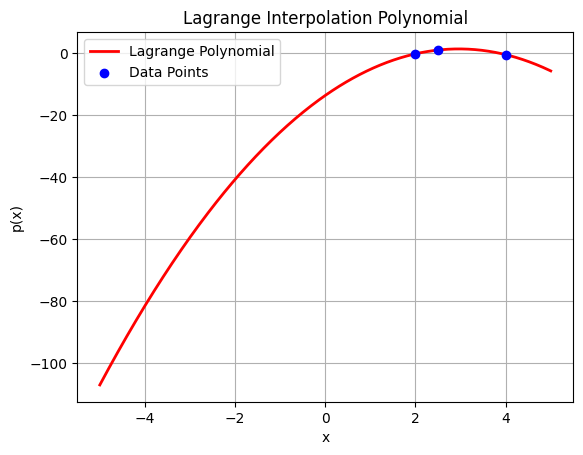

Langrange Basis Polynomials
L_0(x) =  (x - 4)*(2.0*x - 5.0)/2
L_1(x) =  -1.33333333333333*x**2 + 8.0*x - 10.6666666666667
L_2(x) =  (0.666666666666667*x - 1.66666666666667)*(x - 2)/2

The value of the Lagrange polynomial at x = 1.5 is -2.351300859788622


In [ ]:
def f(x):
  return sp.sin(3*x)

x = [2, 2.5, 4]
y = [f(x) for x in x] # Get the corresponding y values by applying f(x)

# Create Lagrange Table
table = create_lagrange_table(x, y)
print(f"Lagrange Interpolation Table:")
for row in table:
    print(row)

# Get the Lagrange interpolation polynomial equation
lagrange_eq = lagrange_interpolation_polynomial_equation(x, y)
print(f"\nLagrange Interpolation Polynomial Equation: {lagrange_eq}")

# Plot the Lagrange polynomial and the data points
plot_lagrange_polynomial_graph(x, y)

# Evaluate the polynomial at a specific point (e.g., x = 1.5)
x_point = 1.5
y_at_point = evaluate_polynomial_at_point(x, y, x_point)
print(f"\nThe value of the Lagrange polynomial at x = {x_point} is {y_at_point}")

In [ ]:
from sympy import symbols, simplify, sin
from math import pi

def lagrange_interpolation(x, points):
    """Perform Lagrange interpolation using the given points."""
    lagrange_polynomial = 0
    for i in range(len(points)):
        numerator = 1
        denominator = 1
        for j in range(len(points)):
            if j != i:
                numerator *= (x - points[j][0])
                denominator *= (points[i][0] - points[j][0])
        lagrange_polynomial += points[i][1] * (numerator / denominator)
    return simplify(lagrange_polynomial)

# data points
x_points = [1.2, 1.4, 1.6, 1.8]
# x_points = [(180/pi)*x for x in x_points]
y_points = [sin(3*x) for x in x_points]
points = list(zip(x_points, y_points))


x = symbols('x')
interpolating_polynomial = lagrange_interpolation(x, points)
print("f for sin(3x):", interpolating_polynomial)


print("f(1.5) from polynomial:", interpolating_polynomial.subs(x, 1.5).evalf())
print("sin(3(1.5))           :", sin(3*1.5))

f for sin(3x): 0.906718020950478*x**3 - 0.00238452928604715*x**2 - 6.74520441587862*x + 6.0883498377288
f(1.5) from polynomial: -0.974648656274869
sin(3(1.5))           : -0.977530117665097


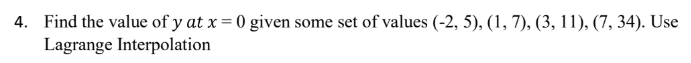

Lagrange Interpolation Table:
[1, '(x - 1) / (-2 - 1)', '(x - 3) / (-2 - 3)', '(x - 7) / (-2 - 7)']
['(x - -2) / (1 - -2)', 1, '(x - 3) / (1 - 3)', '(x - 7) / (1 - 7)']
['(x - -2) / (3 - -2)', '(x - 1) / (3 - 1)', 1, '(x - 7) / (3 - 7)']
['(x - -2) / (7 - -2)', '(x - 1) / (7 - 1)', '(x - 3) / (7 - 3)', 1]
Langrange Basis Polynomials
L_0(x) =  -(x - 7)*(x - 3)*(x - 1)/135
L_1(x) =  (x - 7)*(x - 3)*(x + 2)/36
L_2(x) =  -(x - 7)*(x - 1)*(x + 2)/40
L_3(x) =  (x - 3)*(x - 1)*(x + 2)/216
Final Lagrange Interpolation Polynomial:  43*x**3/1080 + 101*x**2/540 + 793*x/1080 + 1087/180

Lagrange Interpolation Polynomial Equation: 43*x**3/1080 + 101*x**2/540 + 793*x/1080 + 1087/180
Langrange Basis Polynomials
L_0(x) =  -(x - 7)*(x - 3)*(x - 1)/135
L_1(x) =  (x - 7)*(x - 3)*(x + 2)/36
L_2(x) =  -(x - 7)*(x - 1)*(x + 2)/40
L_3(x) =  (x - 3)*(x - 1)*(x + 2)/216


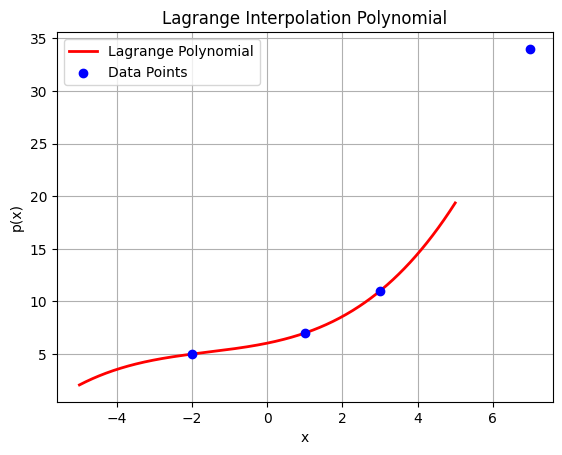

Langrange Basis Polynomials
L_0(x) =  -(x - 7)*(x - 3)*(x - 1)/135
L_1(x) =  (x - 7)*(x - 3)*(x + 2)/36
L_2(x) =  -(x - 7)*(x - 1)*(x + 2)/40
L_3(x) =  (x - 3)*(x - 1)*(x + 2)/216

The value of the Lagrange polynomial at x = 0 is 6.038888888888889


In [ ]:
## Correct ans
x = [-2, 1, 3, 7]
y = [5, 7, 11, 34]

# Create Lagrange Table
table = create_lagrange_table(x, y)
print(f"Lagrange Interpolation Table:")
for row in table:
    print(row)

# Get the Lagrange interpolation polynomial equation
lagrange_eq = lagrange_interpolation_polynomial_equation(x, y)
print(f"\nLagrange Interpolation Polynomial Equation: {lagrange_eq}")

# Plot the Lagrange polynomial and the data points
plot_lagrange_polynomial_graph(x, y)

# Evaluate the polynomial at a specific point (e.g., x = 1.5)
x_point = 0
y_at_point = evaluate_polynomial_at_point(x, y, x_point)
print(f"\nThe value of the Lagrange polynomial at x = {x_point} is {y_at_point}")

## Least Square Approximation Linear

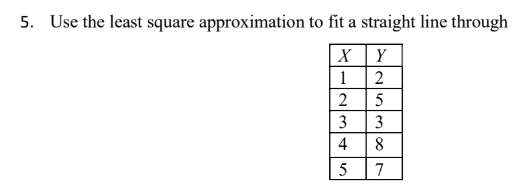

Data Points Table:
x	 y
-1	 3
0	 -4
1	 5
2	 -6
Least Squares Linear Approximation: y = 1.3000x + 1.1000


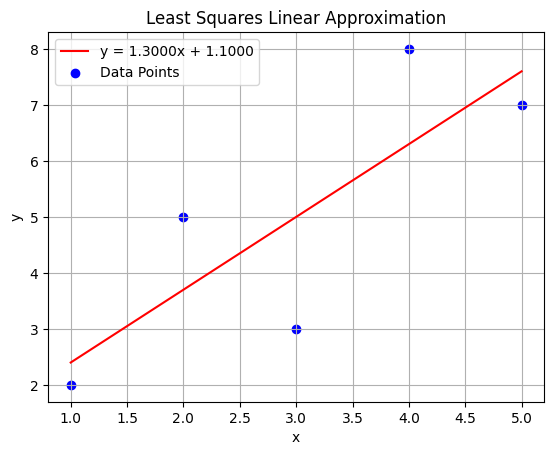

The estimated value at x = 3.5 is y = 5.6500


5.65

In [ ]:
# Create data
x = [1, 2, 3, 4, 5]
y = [2, 5, 3, 8, 7]

# Create a table for the data points
create_least_square_table(x, y)

# Get the least squares linear approximation
m, c = least_square_approximation(x, y)

# Plot the least squares line and the data points
plot_least_square_approximation(x, y, m, c)

# Get the value at a specific point
get_least_square_value_at_point(m, c, 3.5)

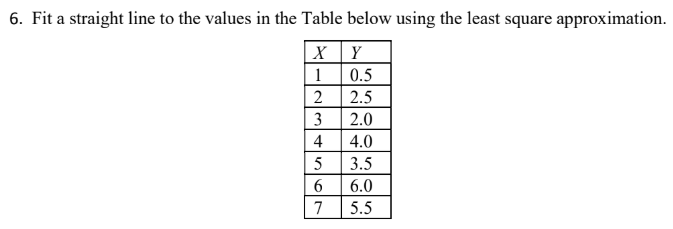

Data Points Table:
x	 y
-1	 3
0	 -4
1	 5
2	 -6
Least Squares Linear Approximation: y = 0.8393x + 0.0714


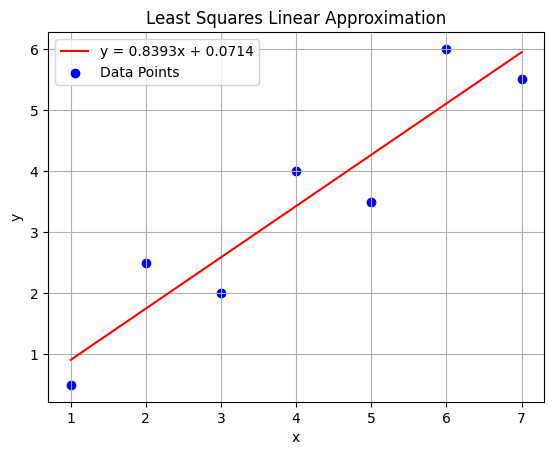

The estimated value at x = 3.5 is y = 3.0089


3.0089285714285716

In [ ]:
# Create data
x = [1, 2, 3, 4, 5, 6, 7]
y = [0.5, 2.5, 2.0, 4.0, 3.5, 6.0, 5.5]

# Create a table for the data points
create_least_square_table(x, y)

# Get the least squares linear approximation
m, c = least_square_approximation(x, y)

# Plot the least squares line and the data points
plot_least_square_approximation(x, y, m, c)

# Get the value at a specific point
get_least_square_value_at_point(m, c, 3.5)